# Modelos de regresión Lineal
## Modelo con datos simulados
* y = a+b*x

* X => 100 valores distribuidos según una N(1.5, 2.5) 

* N(a,b) -> distribución normal estandar, a siendo la media, b la desviación estandar

* para las predicciones vamos a suponer que a = 5 y b = 1.9
* Ye = 5 + 1.9 * X 
* e (error) => estará distribuida según una N(0, 0.8)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [41]:
x = 1.5 + 2.5 * np.random.randn(100)
res = 0 + 0.8 * np.random.randn(100)
y_pred = 5 + 1.9 *x #el y a predecir.
y_act = 5 + 1.9 * x + res #el y real, con el residuo.
# np.random.randn(100) es la normal generada con numpy de tamaño 100

In [42]:
x_list = x.tolist() #lo paso a lista para que se pueda poner en pandas
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [43]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [44]:
data.head() #acá se ve la y_actual, osea lo que registramos, y la y_prediccion lo que predice el modelo

,x,y_actual,y_prediccion
0,-2.227012,0.101179,0.768677
1,0.045913,5.434355,5.087235
2,0.390165,4.915495,5.741314
3,4.076125,12.371132,12.744638
4,6.596798,18.487791,17.533916


In [25]:
#vamos a hacer un plot del valor actual y la prediccion usando x
#import matplotlib.pyplot as plt
#y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)] #valor del promedio de y actual
#y_mean

Text(0.5, 1.0, 'Valor Actual vs Predicción')

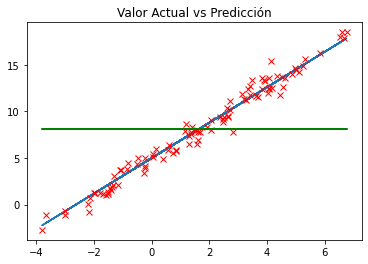

In [46]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x, y_act, "rx")
plt.plot(x, y_mean, "g")
plt.title("Valor Actual vs Predicción")

In [47]:
#Por que graficamos el promedio también? cuando no tenemos un muy buen modelo predictivo, usamos el promedio para ver si realmente es una buena o no forma de predecir los valores

#otro punto a tener en cuenta para juzgar la eficacia, si tenemos datos que contienen dos variables una de entrada y una de salida, el programa estadistica va a generar algunos valores de alfa y beta, asi que como podemos nosotros entender el valor que nos devuelve el programa?

#a cada uno de los puntos se le llama "dato observado", el dato observado forma parte del data set y no se le puede cambiar la naturaleza, es lo que uno ha observado.
#sin embargo, este dato observado (el y_actual), no es el mismo valor de la predicción (se elige un dato muy alejado del grafico de predicción)
#hay una variación entre el dato observado y la predicción y se lo llama "la desviación con respecto al modelo", basicamente, el modelo no puede explicar porque se separa tanto o tan poco de el valor actual

#SSD: suma de los cuadrados de las diferencias (la distancia entre el dato y el modelo)

#Algo a notar también es que el dato elegido esta por debajo del promedio, la distancia entre el promedio y el dato observado se llama "la suma de los cuadrados totales" (SST)

#Hay un tercer valor que basicamente es la diferencia que existe entre la recta de regresión y la recta promedio (en el dato que se predijo), esto se llama "suma de los cuadrados de la regresión"

#En un caso perfecto: SSR = SST y SSD = 0 (osea que no hay error)

#SST (error total cometido): esta compuesto por dos partes, una es la diferencia entre el valor de la regresión y el valor de la media (SSR), osea como el valor de la regresión se aleja de la media y el error aleatorio, que es el que no podemos explicar, que es el SSD, la diferencia entre el dato observado y el dato que se predijo.

#resumiendo: SST = SSR + SSD

#de acá lo que importa es que SSR sea grande y SSD se chicas, osea que el valor aleatorio pese poco frente al SSR, uno quiere que el SSR se acerque mucho a SST

#Algo muy util para saber si una regresión es util o no es:
#R^2= SSR/SST <- Este numero siempre será mas pequeño que 1 y mas grande que 0, mientras mas cerca de 1 este nuestro rango, mejor es el modelo

#entre un modelo con R^2 = 0.9 y R^2 = 0.6, será mejor el modelo con el R^2 = 0.9, igual, no tomarse tan a pecho el R^2, que tenga un buen indicador de R^2 no significa que el modelo sea bueno, se necesita mas información, pero igual es un buen indicador.



In [48]:
data["SSR"] = (data["y_prediccion"]- np.mean(y_act))**2 # (y_predict - y_mean)^2
data["SSD"] = (data["y_prediccion"]-data["y_actual"])**2 # (y_predict - y_actual)^2
data["SST"] = ((data["y_actual"])-np.mean(y_act))**2 #(y_actual - y_promedio)^2

In [49]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,-2.227012,0.101179,0.768677,53.481495,0.445554,63.690014
1,0.045913,5.434355,5.087235,8.967307,0.120492,7.008866
2,0.390165,4.915495,5.741314,5.477788,0.681977,10.025370
3,4.076125,12.371132,12.744638,21.742238,0.139507,18.398532
4,6.596798,18.487791,17.533916,89.342852,0.909878,108.285048


In [50]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [51]:
SSR

2399.1015613227783

In [52]:
SSD

61.646658677743105

In [53]:
SST

2617.8014021100257

In [54]:
SSR+SSD

2460.7482200005215

In [35]:
R2 = SSR/SST

In [36]:
R2 #La predicción de Y es un valor bastante acertado para predecir el Y actual, eso es porque el error que pusimos es bastante pequeño

0.9653538271596914

(array([ 1.,  1.,  5., 18., 24., 27., 19.,  2.,  2.,  1.]),
 array([-2.55525676, -2.03593722, -1.51661768, -0.99729814, -0.4779786 ,
         0.04134093,  0.56066047,  1.07998001,  1.59929955,  2.11861909,
         2.63793863]),
 <a list of 10 Patch objects>)

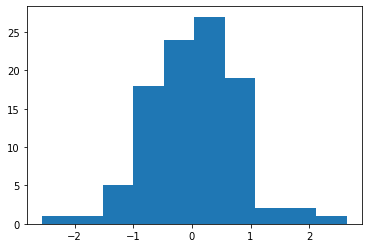

In [55]:
plt.hist(data["y_prediccion"]-data["y_actual"])

# Regresión Lineal simple en Python
## El paquete statsmodel para regresión lineal


In [2]:
import pandas as pd

In [5]:
data = pd.read_csv("advertising.csv")

In [6]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
import statsmodels.formula.api as smf

In [7]:
lm = smf.ols(formula="Sales~TV", data=data).fit()
#lm = lineal model
#smf = statsmodelformula
#ols = minimos cuadrados ordinarios (minimiza la suma de los cuadrados de los errores)
#formula= formula de la regresión que quiero llevar a cabo, quiero predecir los Sales en función de TV
#data = el dataset que usamos.
#fit() = crea el modelo con la recta que mejor se ajusta utilizando la tecnica de minimizar la suma de los cuadrados de los errores


In [8]:
lm.params
#intercept = es la a (alfa) en nuestro modelo lineal
#TV = el b (beta) que acompaña a x

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería:
    Sales = 7.032594 + 0.047537*TV

Hemos asumido una relación lineal entre costes de publicidad en TV y Sales

los valores de estos parametros son estimados y por eso tienen un p-valor asoaciado a cada uno de ellos, un p-valor que nos dice si es pequeño y se puede aceptar que ese parametro no es 0, y si es alto podemos decir que ese parametro es posible que sea 0


In [9]:
lm.pvalues #me muestra los p-values

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [10]:
#Son super pequeños, lo que me dice que es imposible que el parametro sea 0

In [11]:
lm.rsquared #precisión del modelo

0.611875050850071

In [12]:
lm.rsquared_adj #mejor indicador de R^2

0.6099148238341623

In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           1.47e-42
Time:                        17:16:13   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

mientras mas alto es AIC y BIC mejor es el modelo

In [14]:
sales_pred = lm.predict(pd.DataFrame(data["TV"])) #generamos un dataframe con la columna de TV del dataframe original

In [15]:
sales_pred #usa el TV como x en el modelo lineal, en cada fila se usa un TV distinto

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

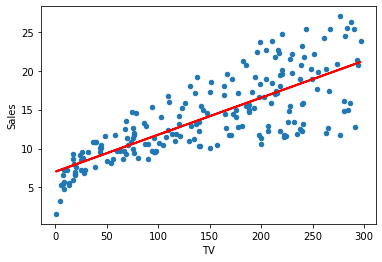

In [16]:
data.plot(kind="scatter", x = "TV", y="Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red",linewidth= 2)

In [17]:
#Si queremos saber el error estandar
data["sales_pred"] = 7.032594 + 0.047537 * data["TV"] #añado la columna de las predicciones

In [18]:
data["RSE"] = (data["Sales"]-data["sales_pred"])**2

In [19]:
SSD = sum(data["RSE"])
RSE = np.sqrt(SSD/(len(data)-2))

In [20]:
SSD

2102.5305838896525

In [21]:
RSE #desviación de los residuos

3.258656369238098

In [22]:
sales_m = np.mean(data["Sales"])

In [23]:
sales_m

14.022500000000003

In [24]:
error = RSE/sales_m
error #Error del 23%

0.2323876890168014

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

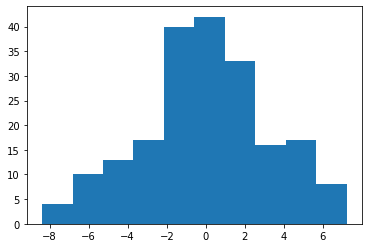

In [25]:
plt.hist((data["Sales"]-data["sales_pred"])) #los errores también llevan una distribución normal

# Regresión Lineal múltiple en Python
## El paquete statsmodel para regresión múltiple
* Sales ~TV
* Sales ~Newspaper
* Sales ~Radio
* Sales ~TV+Newspaper
* Sales ~TV+Radio
* Sales ~Newspaper+Radio
* Sales ~TV+Newspaper+Radio

In [26]:
#enfoque constructivo: empezar sin nada e ir metiendo variables y fijarse su p-valor y como varia R^2

#enfoque destructivo: Se ponen todas las variables y se van sacando cada una para ver como varia el R^2 y el P-valor.
lm2 = smf.ols(formula="Sales~TV+Newspaper", data=data).fit()

In [27]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [28]:
lm2.pvalues #el modelo sugiere que los 3 parametros son buenos y no son nulos, por tanto el modelo parece bastante robusto

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Sales = 5.774948 + 0.046901 * TV + 0.044219 * Newspaper

In [29]:
lm2.rsquared

0.6458354938293273

In [30]:
lm2.rsquared_adj

0.6422399150864777

In [31]:
sales_pred = lm2.predict(data[["TV", "Newspaper"]])

In [32]:
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [33]:
SSD = sum((data["Sales"]-sales_pred)**2)

In [34]:
SSD

1918.5618118968275

In [35]:
RSE = np.sqrt(SSD/(len(data)-3)) #3 Porque estoy usando 2 variables predictoras 
                              #(el 3 sale de numero de variables predictoras - 1)

In [36]:
RSE #Hemos bajado de 3.25 a 3.12 (muy poco)

3.1207198602528856

In [37]:
error = RSE/sales_m

In [38]:
error #22% del modelo no está explico (vs 23% del otro modelo), pero igual este es mejor.

0.2225508903728212

In [39]:
lm2.summary() #p-valor global y F estadistica bajan, lo que significa que este modelo predice mejor que lm
#sin embargo, la mejora es marginal (1% mejor)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           3.95e-45
Time:                        17:16:30   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#Por lo tanto, mejorar el periodico no nos cambió mucho...

In [41]:
lm3 = smf.ols(formula="Sales~TV+Radio", data=data).fit()

In [61]:
sales_pred = lm3.predict(data[["TV", "Radio"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-2-1))

In [63]:
RSE

1.681360912508001

In [65]:
RSE/sales_m #Error aleatorio = 11%, casí 12%

0.11990450436855059

In [66]:
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data=data).fit()

In [70]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           4.83e-98
Time:                        17:31:26   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
lm4.summary() #p-valor alto, el intervalo de confianza [0.025 a 0.975] en Newspaper incluye al 0.
#El coeficiente de Newspaper es negativo, osea que resta a ventas
#el T asociado de Newspaper es bajo
#El estadistico F ha decrecido significativamente

#el beneficio parcial de añadir el Newspaper afecta negativamente al modelo, predice peor y por eso hay que sacarlo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           1.58e-96
Time:                        17:35:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
sales_pred = lm4.predict(data[["TV", "Radio","Newspaper"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3-1))
RSE/sales_m #12% de error, ¡Más error que en el caso sin Newspaper!

0.12020041885646236

# Multicolinealidad
## Razón de por qué nuestro modelo se comporta peor cuando agregamos el periodico al modelo final y da una performance sub-optima
correlación entre variables predictoras del modelo

In [80]:
data.corr() #Radio Y Newspaper estan muy relacionados
#esto incrementa la variabilidad del coeficiente estimado para la variable predictora
#esto es un problema, porque el hecho de que las dos formen parte del modelo significa que una interactua negativamente con la otra
#Para estos coeficientes se calcula la t-estadistico y se calcula dividiendo por la variabilidad promedio o el error, si el error sube el t-estadistico baja y el p-valor se incrementa
#esto hace que la probabilidad de que H nulo sea verdadero se incrementa

,TV,Radio,Newspaper,Sales,sales_pred,RSE
TV,1.000000,0.054809,0.056648,0.782224,1.000000,0.490091
Radio,0.054809,1.000000,0.354104,0.576223,0.054809,0.079114
Newspaper,0.056648,0.354104,1.000000,0.228299,0.056648,0.056557
Sales,0.782224,0.576223,0.228299,1.000000,0.782224,0.341942
sales_pred,1.000000,0.054809,0.056648,0.782224,1.000000,0.490091
RSE,0.490091,0.079114,0.056557,0.341942,0.490091,1.000000


### VIF(factor de inflación de la varianza): cuantifica la intensidad de la multicolinealidad en un análisis de regresión normal de mínimos cuadrados.

Si el factor VIF:

* es igual a 1: significa que las variables no tienen correlación alguna (caso optimo)
* esta entre 1~5: las variables estan correlacionadas de forma moderada con otras variables predictoras pero igual pueden formar parte del modelo
* mayor a 5: las variables son altamente correlacionadas y necesitan ser eliminadas del modelo

In [83]:
# Newspaper ~ TV + Radio => R^2_VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper~TV+Radio",data=data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF


1.1451873787239288

In [84]:
# Radio ~ TV + Newspaper => R^2_VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Radio~TV+Newspaper",data=data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF


1.1449519171055353

In [86]:
# TV ~ Newspaper + Radio => R^2_VIF = 1/(1-R^2)
lm_n = smf.ols(formula="TV~Radio+Newspaper",data=data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF #Está claro que la TV no esta correlacionada a ninguna otra variable porqueda 1


1.00461078493965

El periodico y la radio tienen casi casi la misma VIF, esto significa que estas dos variables estan absolutamente correlacionadas entre ellas pero no con la TV (porque tiene un VIF super chico)

como periodico y radio estan correlacionadas es de suponer que el indice VIF será mas grande para estas dos variables sin embargo ver que el modelo con tv y radio es mas eficaz que con tv y newspaper

esto significa que el modelo con las 3 variables no mejoran y que el modelo mas eficaz es el de TV y Radio

In [88]:
lm3.summary() #<- Modelo definitivo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           4.83e-98
Time:                        18:02:08   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Hay que validar los modelos que creamos para ver como se comporta en diferentes conjuntos de datos, mientras que la eficacia del modelo se mantiene constante en el conjunto de datos, suele variar dependeiendo de la fuente de donde salen los datos y ver si estas son o no similares.

Para ver si hay un problema de Over-fitting, hay que comprobar si el modelo se ajusta demasiado bien al conjunto de datos que nosotros le hayamos suministrado pero no es capaz de modelar correctamente cualquier elemento que no forma parte del data

este problema del over fitting es tan común que incluso existe la tecnica de validar con el propio conjunto de datos que tenemos dividiendolo en 2, una parte con la cual entrenamos el modelo, y una segunda parte con la que validamos si se comporta bien con los elemento que no han sido utilizados para entrenar el mismo

# Dividir el dataset en conjunto de entrenamiento y de testing


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
data = pd.read_csv("advertising.csv")

In [117]:
a = np.random.randn(len(data)) #Distribución normal de la longitud del dataset, 
#son solo len(data) valores aleatorios de una distribución de promedio 0 y varianza 1
#distribución uniforme con la misma cantidad de elementos que nuestro dataset original

(array([ 3., 12., 15., 34., 55., 37., 25., 11.,  4.,  4.]),
 array([-2.17388778, -1.68293935, -1.19199091, -0.70104247, -0.21009403,
         0.28085441,  0.77180285,  1.26275128,  1.75369972,  2.24464816,
         2.7355966 ]),
 <a list of 10 Patch objects>)

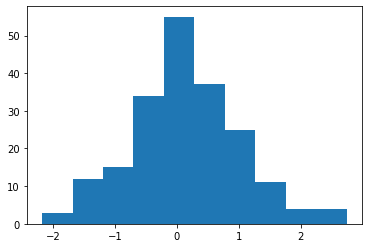

In [118]:
plt.hist(a)

In [119]:
check = (a<0.8) #me quedo con el 80% de estos elementos
training = data[check] #me quedo con el 80% del dataset para entrenar al modelo
testing = data[~check] #me quedo con el 20% del dataset para testear al modelo

In [120]:
training

,TV,Radio,Newspaper,Sales
1,44.5,39.3,45.1,10.4
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
...,...,...,...,...
194,149.7,35.6,6.0,17.3
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [121]:
testing

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
2,17.2,45.9,69.3,9.3
5,8.7,48.9,75.0,7.2
10,66.1,5.8,24.2,8.6
17,281.4,39.6,55.8,24.4
18,69.2,20.5,18.3,11.3
21,237.4,5.1,23.5,12.5
22,13.2,15.9,49.6,5.6
25,262.9,3.5,19.5,12.0
32,97.2,1.5,30.0,9.6


In [122]:
len(training), len(testing)

(158, 42)

In [123]:
import statsmodels.formula.api as smf

In [124]:
lm = smf.ols(formula="Sales~TV+Radio",data=training).fit()

In [126]:
lm.summary() #cuanto menor es el data set mayor es el SSD y menor es n-k-1 que es el valor que se utiliza el F-estadistico

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     825.7
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           2.23e-83
Time:                        20:13:01   Log-Likelihood:                -288.02
No. Observations:                 158   AIC:                             582.0
Df Residuals:                     155   BIC:                             591.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9730      0.304      9.768      0.000       2.372       3.574
TV             0.0449      0.001     32.097      0.000       0.042       0.048
Radio          0.1920      0.008     23.017      0.000       0.176       0.209
==============================================================================
Omnibus:                       11.038   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.721
Skew:                          -0.666   Prob(JB):                      0.00285
Kurtosis:                       3.086   Cond. No.                         438.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.9730 + 0.0449 * TV + 0.1920 * Radio

## Validación del modelo con el conjunto de testing

In [137]:
sales_pred = lm.predict(testing[["TV","Radio"]])
sales_pred

0      20.573599
2      12.560907
5      12.755034
10      7.057552
17     23.224834
18     10.019950
21     14.621775
22      6.619757
25     15.460535
32      7.629466
40     16.356472
47     21.724606
51      9.328855
53     20.052015
55     21.399126
64     17.084519
65      7.860046
70     17.797649
73      9.883209
79      9.665071
80     11.534222
84     20.826192
86     11.683364
96     12.525788
104    20.265472
106     6.209053
115    13.069778
130    10.609466
131    15.448676
140     9.536548
143     8.768634
145     9.643308
155     5.384982
163    17.388381
168    17.185890
173    11.904832
179    12.335927
181    13.829975
186     9.645763
187    17.073222
188    18.495986
195     5.400358
dtype: float64

In [138]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

204.20812661502276

In [139]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

2.2882538781004196

In [140]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error #17% de error

0.17313396303407969

Mientras mas alto es el estadistico F y mas bajo el P valor mejor es el modelo, a parte del R^2, hay que ver estos datos.